In [1]:
rule_id_list = [
    'No learning',
    'SOM inhib, Post-synaptically gated, input profile',
    'Hebb inhib, Pre-synaptically gated, wedge profile'
]

learning_rule = rule_id_list[2]

In [2]:
sim_cond_list = [
    'no input', #0
    'no visual input and no current injection', #1
    'narrow, probe, 360d span', #2
    'natural turning, gaussian, narrow', #3
    'natural turning, two gaussians, narrow', #4
    'natural turning, complex scene, narrow', #5
    'natural turning, gaussian, narrow, 2D', #6
    'natural turning, two gaussians, narrow, 2D', #7
    'natural turning, 4 objects, same elevation, 2D', #8
    'natural turning, 4 objects, diff elevation, 2D', #9
    'natural turning, 4 objects, diff elevation - arrangement 2, 2D', #10
    'natural turning, natural scene 1, 2D', #11
    'natural turning, natural scene 2, 2D', #12
    'natural turning, gaussian, narrow, top row in 2D', #13
    'natural turning, gaussian, narrow, bottom row in 2D' #4
]

sim_cond = sim_cond_list[5]

# Set up a session for the simulation

In [3]:
import sys
sys.path.insert(0, 'params')
from params import session

pos_data = '/Users/dante/Documents/GitHub/SSKSimulation/src/Kim_etal_Nature2019_sim_codes/pos_data.mat'
s = session(sim_cond = sim_cond, learning_rule = learning_rule,
            input_weight = 'von Mises weight', # 'random weight', 'zero weight', 'von Mises weight'
            add_noise = True, #False
            n_input_elevation = 1, #1 or 8 for 2D examples
            pos_data = pos_data)

max amp of input=0.11666666666666665


### Run the differential equation

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
from RingAttractorODESolver import RingAttractorODESolver

sol = solve_ivp(RingAttractorODESolver,
                [s.t[0], s.t[-1]],
                np.concatenate((s.wedge_input.flatten(),s.W_input.flatten())),
                args = [s],
                t_eval = s.t)

  60.00006637027443s
  80.00049612078304s
  140.0005743688015s
  160.00032063940884s
  260.0002896093231s
  360.00018452099687s
  400.0s


### Plot the wedge activity over time

<AxesSubplot:>

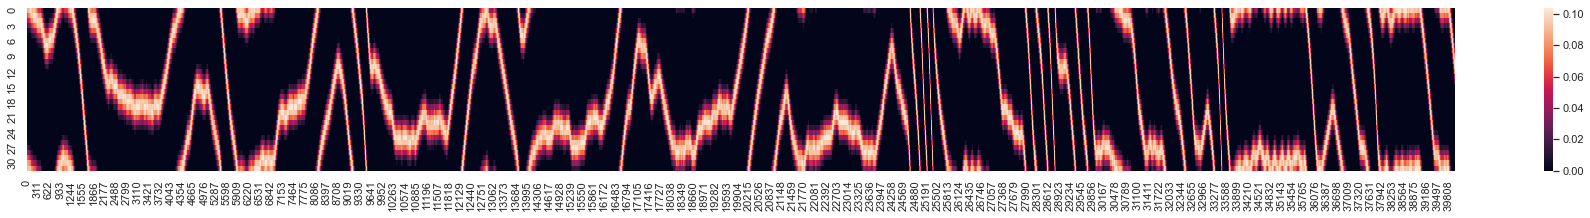

In [5]:
import seaborn as sns

timePts = sol.t
wedge_act = sol.y[0:s.bumpParams.n_wedge_neurons,:]
sns.set(rc = {'figure.figsize':(32, 3)})
sns.heatmap(wedge_act)

### Get the weights

In [6]:
weights = sol.y[s.bumpParams.n_wedge_neurons:,:]
weights = [np.reshape(w, (s.bumpParams.n_wedge_neurons, s.ringParams.n_input_nodes)) for w in [weights[:,t] for t in range(0,len(timePts))]]

### Plot the weights at a few time points

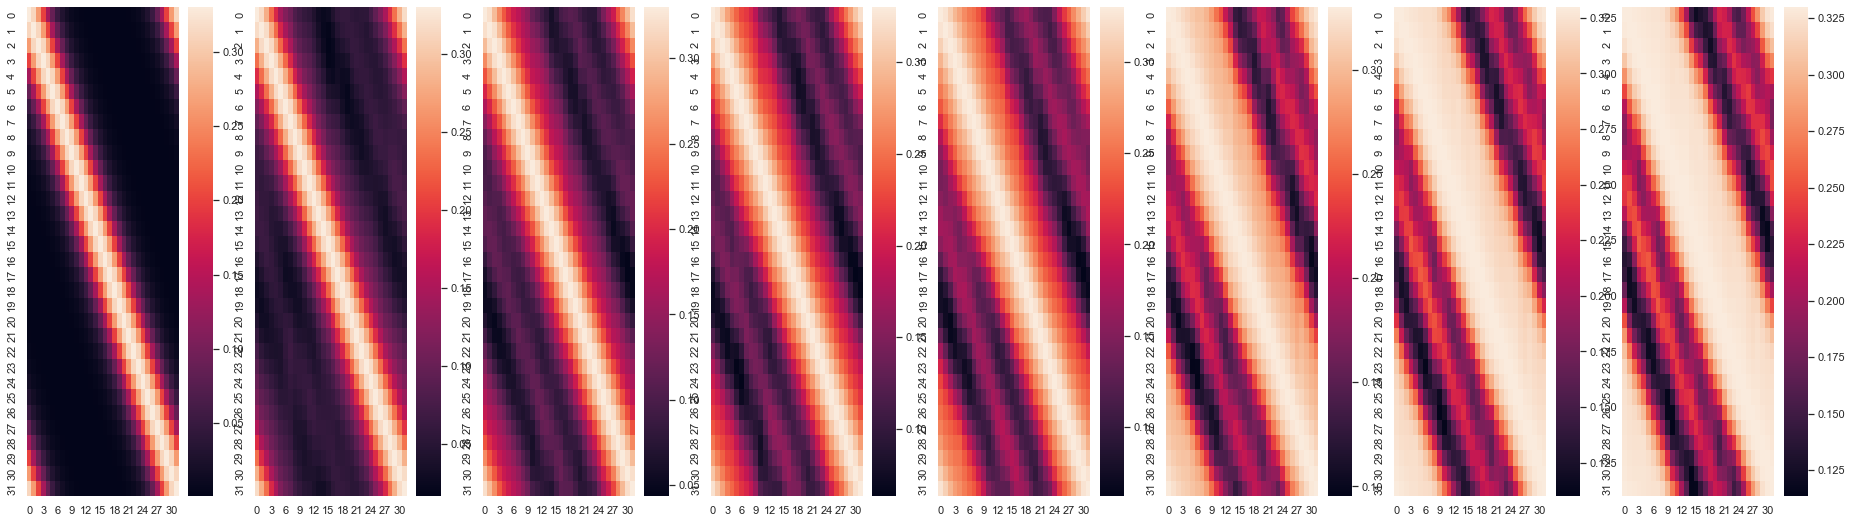

In [7]:
import pandas as pd
from matplotlib import pyplot as plt

numPlts = 8
tPts = np.linspace(0,len(timePts)-1,numPlts,dtype = int)

fig, axs = plt.subplots(1,numPlts, figsize = (32,9))

for i,n in enumerate(tPts):
    sns.heatmap(weights[n], ax = axs.ravel()[i])